# Online Payment Fraud Detection
The Online Payment Fraud Detection dataset is designed to facilitate the detection of fraudulent online transactions in a payment system. This dataset contains information about various online payment transactions, and the task is to predict whether a given transaction is fraudulent or not based on multiple features.

Objective:
The primary objective is to classify each transaction as either fraudulent or non-fraudulent. The model uses the features of each transaction to determine the likelihood that a particular transaction is fraudulent.

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [43]:
df=pd.read_csv('fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [44]:
df.shape

(6362620, 11)

In [45]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [46]:
df.duplicated().sum()

0

In [47]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

# Data Visualization

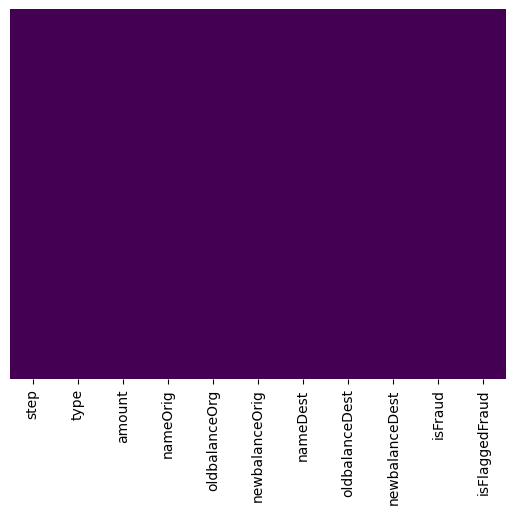

In [61]:
# Check null values
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')
plt.show()

The dataset has no null values

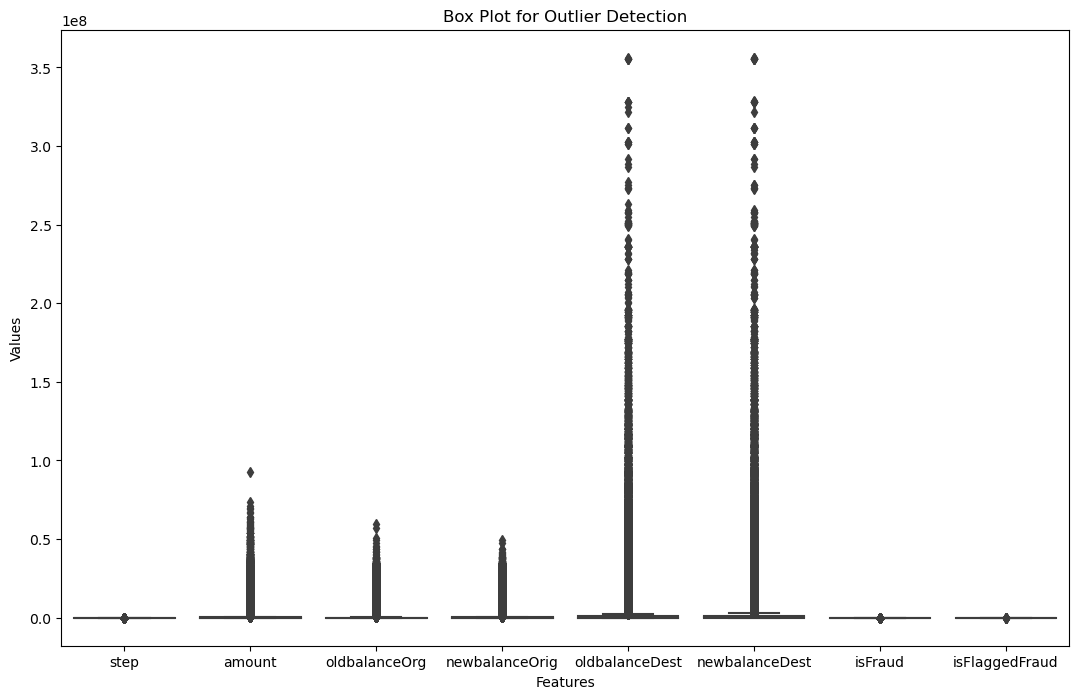

In [69]:
# Check the outlier
plt.figure(figsize=(13, 8))
sns.boxplot(data=df)
plt.title("Box Plot for Outlier Detection")
plt.xlabel("Features")
plt.ylabel("Values")
plt.show()

The detected outlier I wil handle in preprocessing section

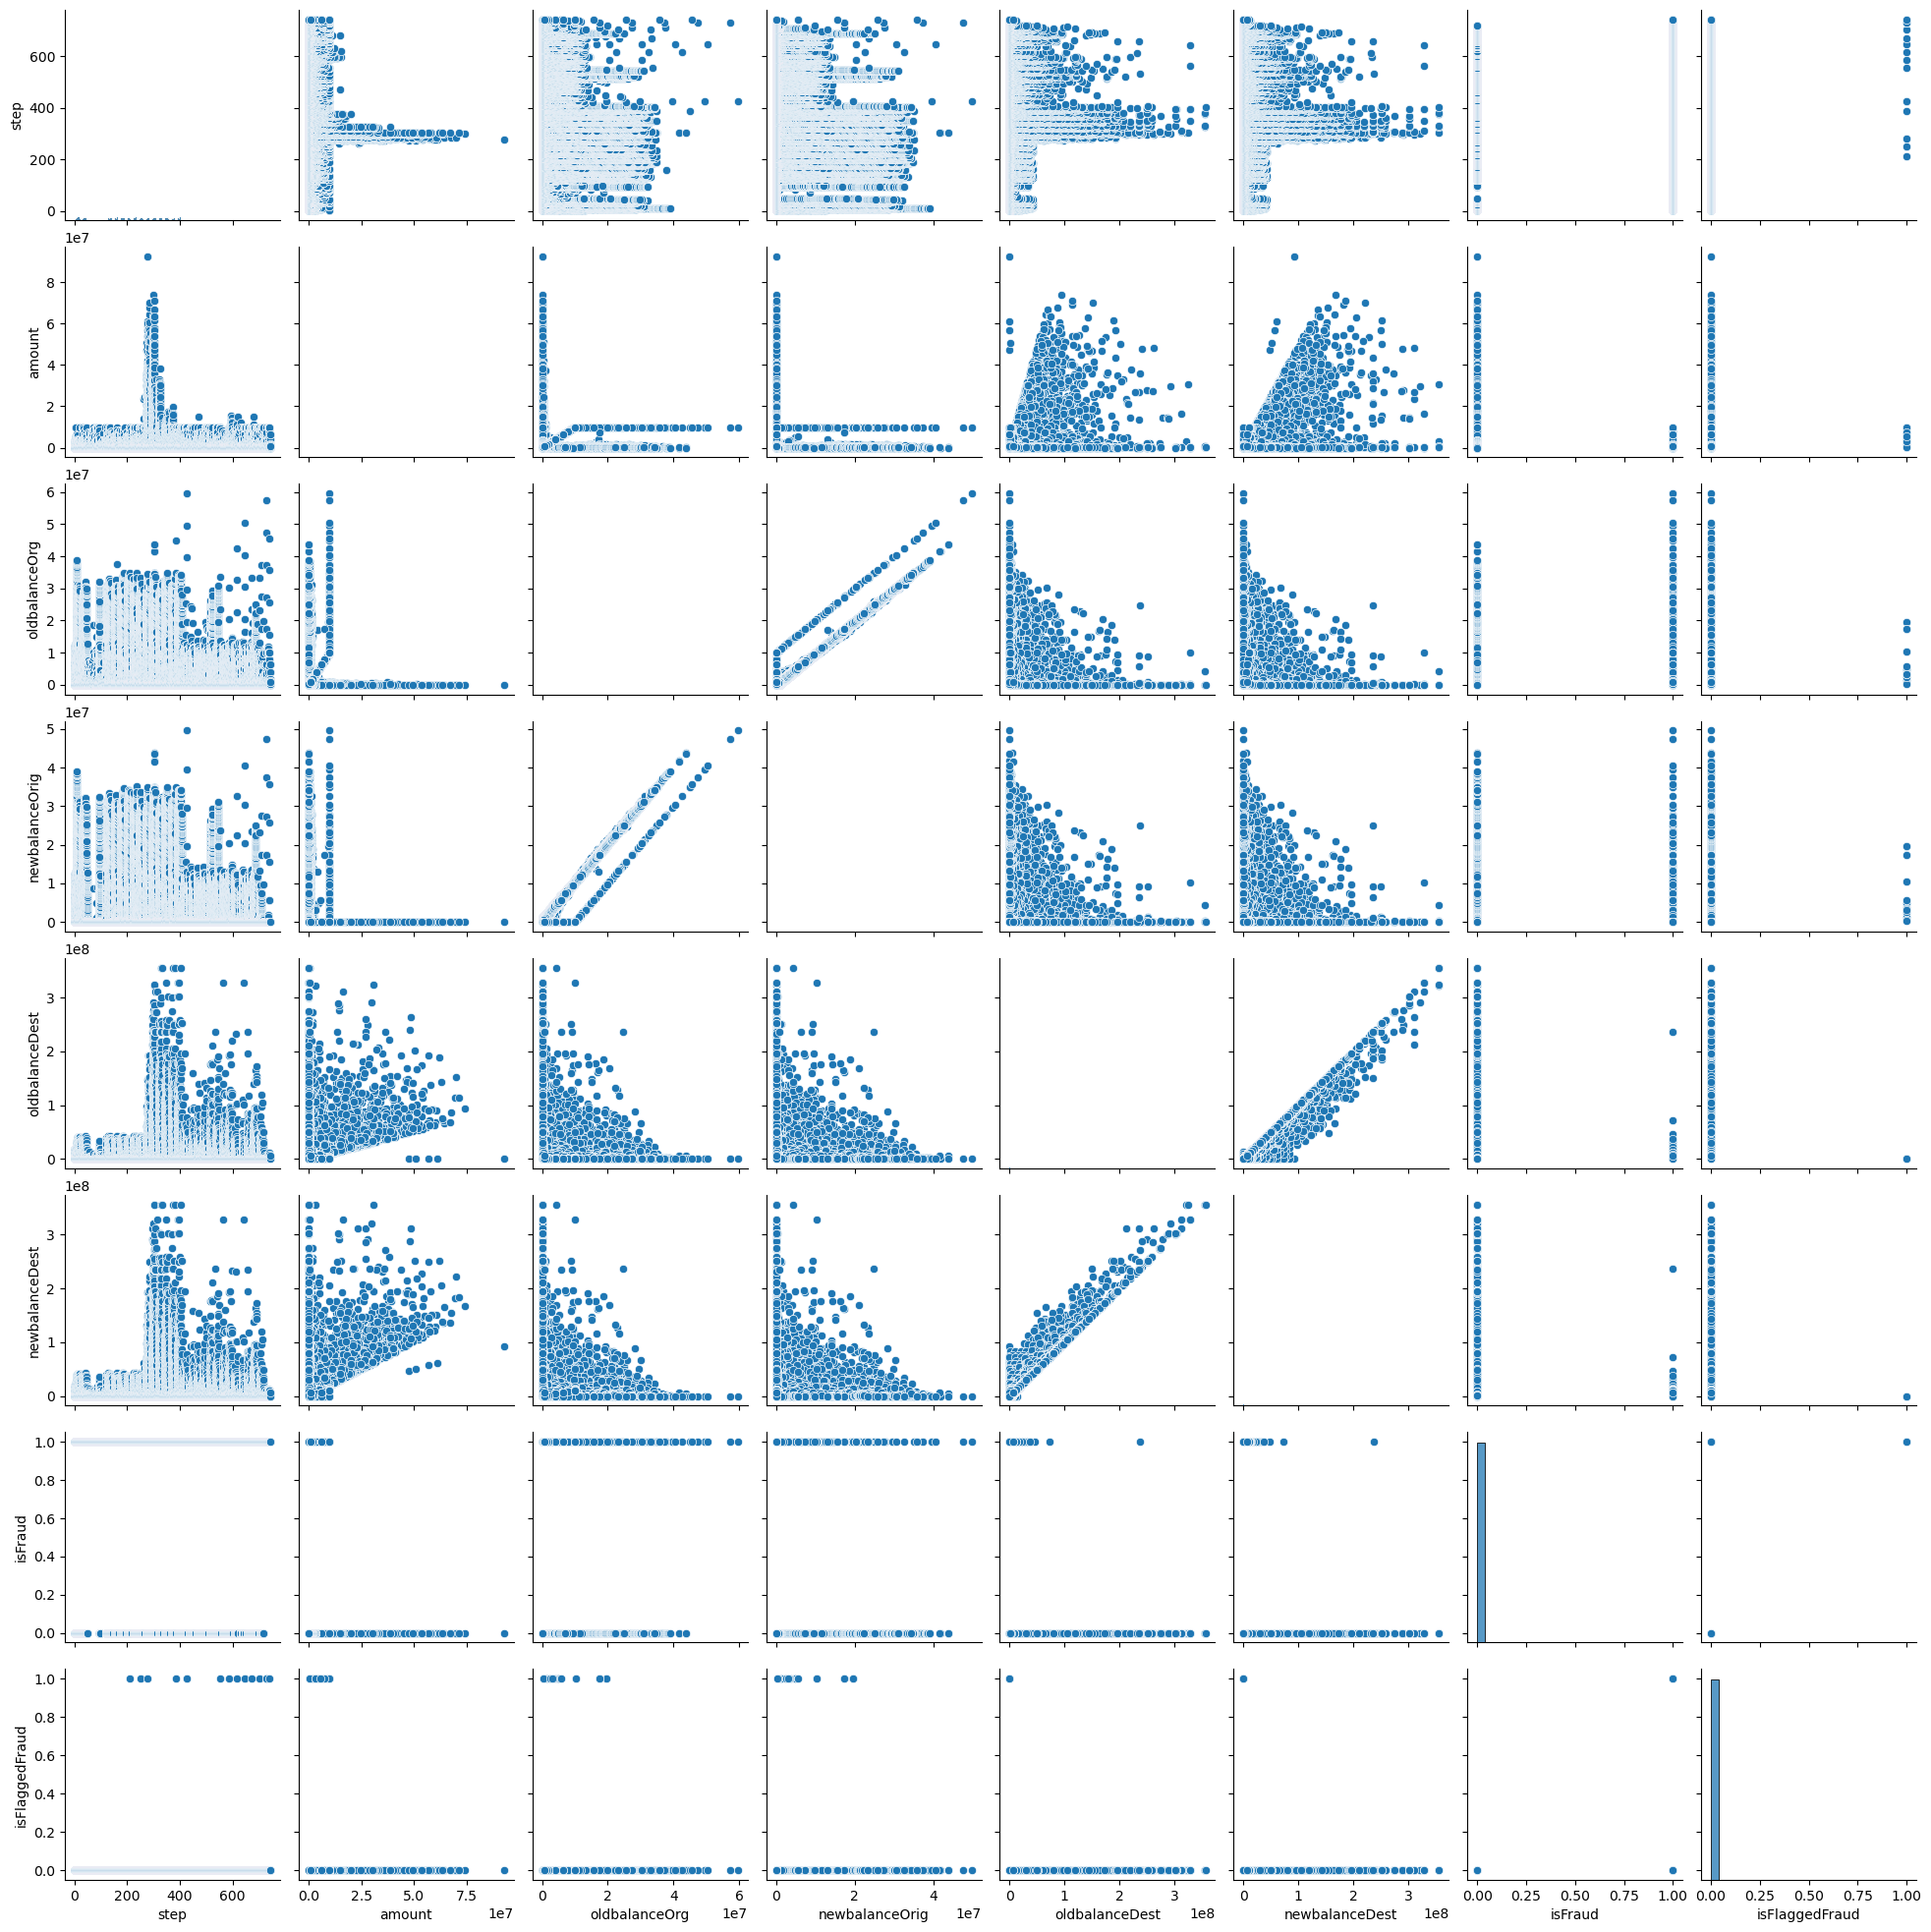

In [7]:
# Identify relationships between variables.
sns.pairplot(df)

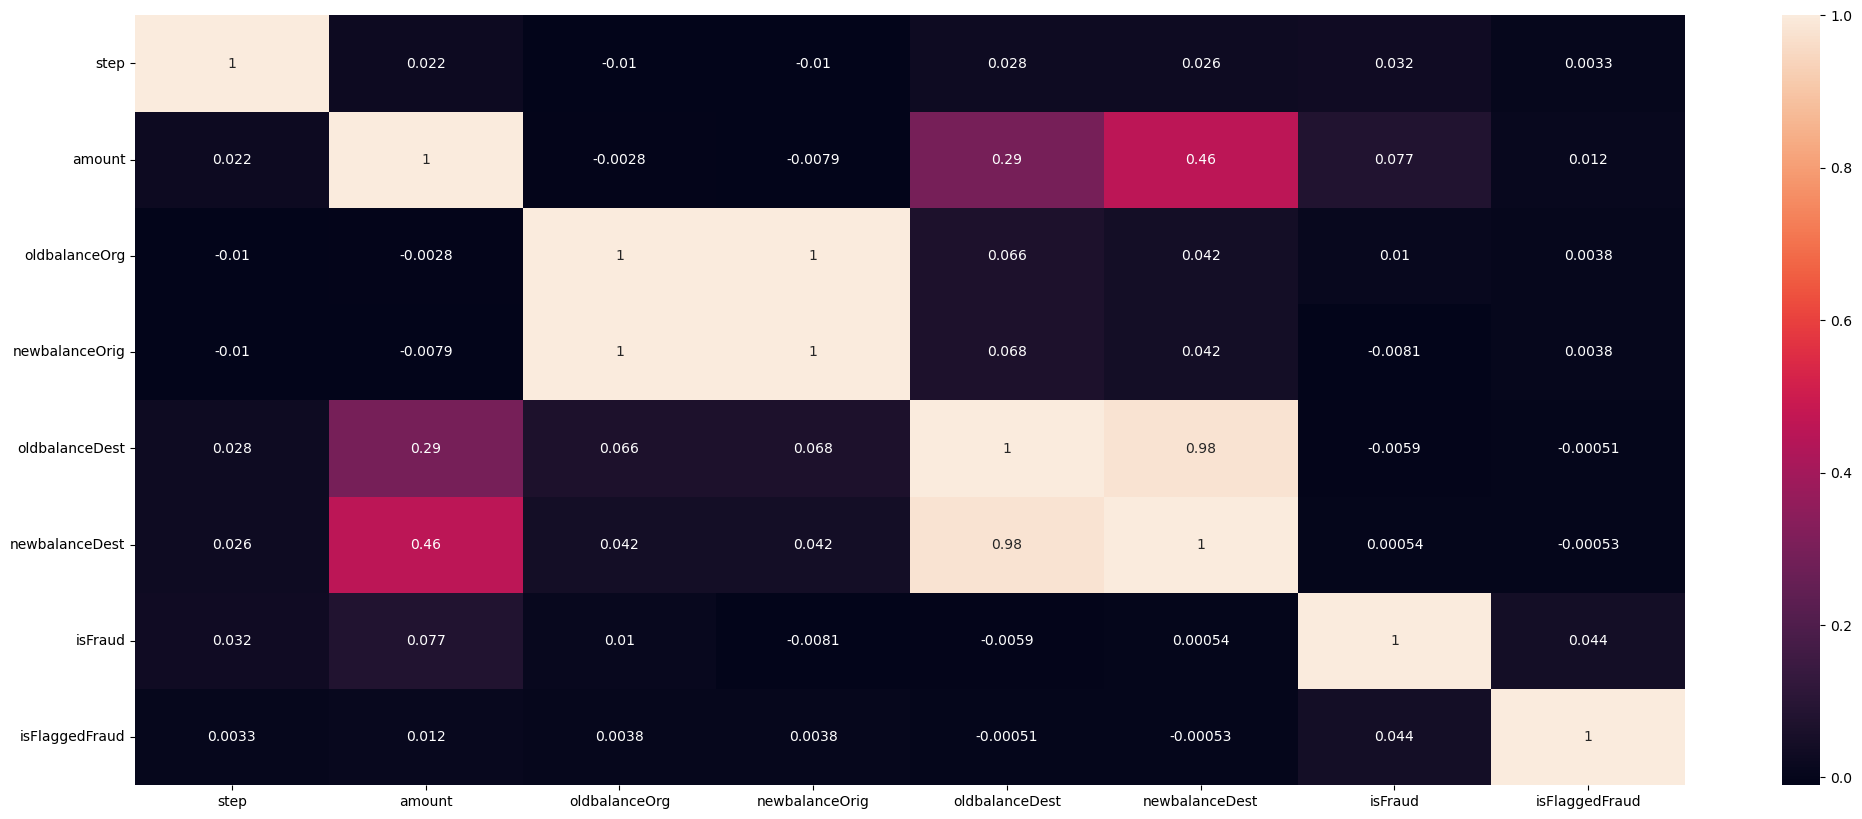

In [40]:
# Identify relationships between variables.
plt.figure(figsize = (25,10))
sns.heatmap(df.corr(),annot=True);

There is features highly correlated features provide the same information (newbalanceOrig with oldbalanceOrg , newbalanceDest with oldbalanceDest),but I will not remove it becacuse in fraud detection task these features is very useful even they high correlated

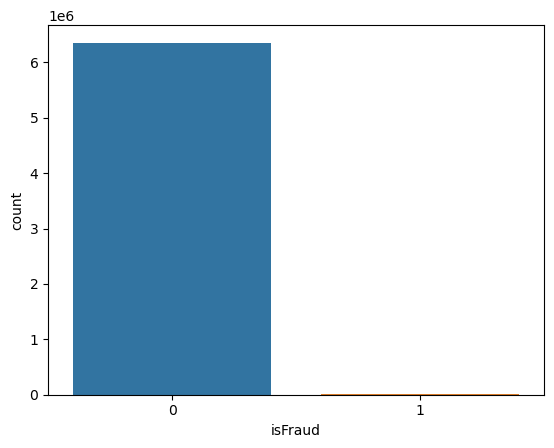

In [41]:
# Visualize number of isFraud (zero and one)
sns.countplot(data = df , x= 'isFraud');

In [42]:
# Get the number of fraud transaction and legal transaction
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

The dataset is imbalance as the isFraud = 0 is dominating

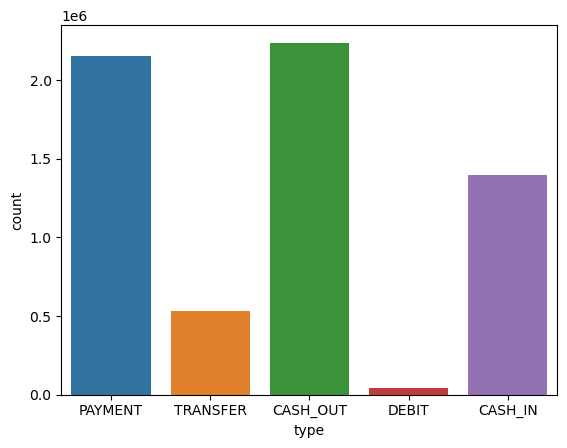

In [43]:
# visualize number of type 
sns.countplot(data = df , x= 'type');

In [44]:
# Get the number of transaction types
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

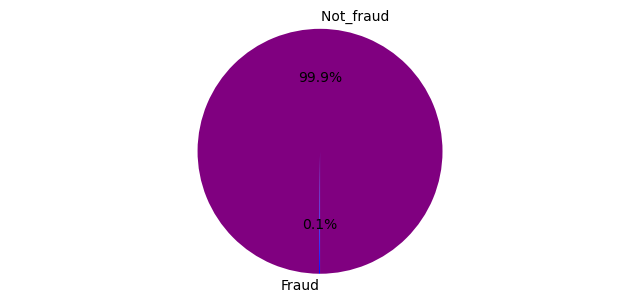

In [45]:
data = np.array([6354407,8213]) 
labels = ['Not_fraud ', 'Fraud']
colrs=['purple', 'blue']
fig, ax = plt.subplots(figsize=(8, 3.5)) 
ax.pie(data,
       labels=labels, autopct='%1.1f%%',
       startangle=270, colors=colrs) 
ax.axis('equal')
plt.show()

type
CASH_OUT    4116
TRANSFER    4097
dtype: int64


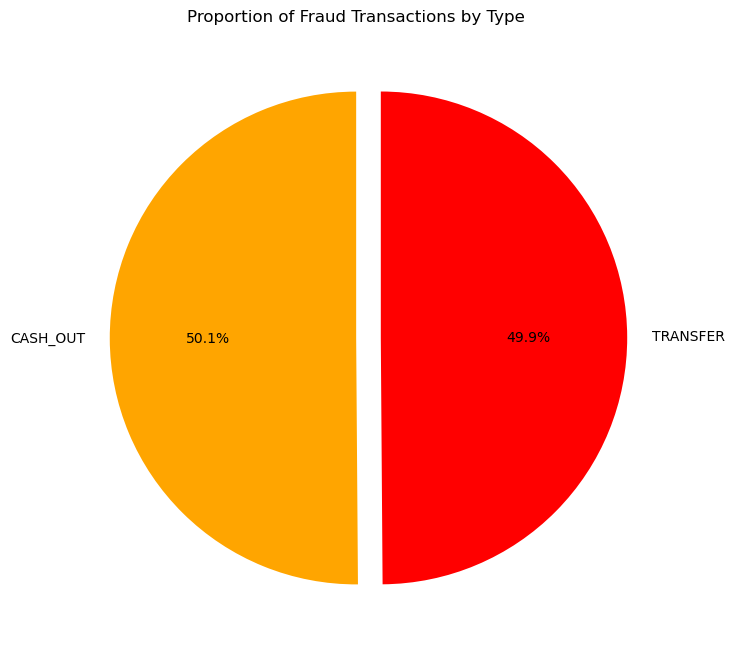

In [46]:
fraud_transactions = df[df["isFraud"] == 1]
fraud_counts_by_type = fraud_transactions.groupby("type").size()
print(fraud_counts_by_type)

plt.figure(figsize=(8, 8))
plt.pie(fraud_counts_by_type, labels=fraud_counts_by_type.index, autopct='%1.1f%%', startangle=90, colors=['orange', 'red'], explode=(0, 0.1))
plt.title('Proportion of Fraud Transactions by Type')
plt.show()

In [47]:
# In wchich type of transaction the Fraud detected
fraud_transactions = df[df["isFraud"] == 1]
fraud_counts_by_type = fraud_transactions.groupby("type").size()
print(fraud_counts_by_type)

type
CASH_OUT    4116
TRANSFER    4097
dtype: int64


 Only in cash_out and transfer fraud was occured 50.1% of fraud transection happen in CASH_OUT and 49.9 % in TRANSFER

# Data Preprocessing

In [48]:
# Covert varibales of coulmn type to numbers to apply the models, i chosse to do it like this instead of hot encoder
df['type']=df['type'].replace('CASH_OUT',0)
df['type']=df['type'].replace('PAYMENT',1)
df['type']=df['type'].replace('CASH_IN',2)
df['type']=df['type'].replace('TRANSFER',3)
df['type']=df['type'].replace('DEBIT',4)

In [49]:
# Function name convert varibales of nameOrig and nameDest to 0 or 1 depended on the first character of the records
# Starts with C means its a Customer so convert to 0
# Starts with M means its a merchant so convert to 1
def name(x):
    if x.startswith('C'):
        return '0'
    elif x.startswith('M'):
        return '1'

df['nameDest'] = df['nameDest'].apply(name)

In [50]:
df['nameOrig'] = df['nameOrig'].apply(name)

In [51]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,1,9839.64,0,170136.0,160296.36,1,0.0,0.0,0,0
1,1,1,1864.28,0,21249.0,19384.72,1,0.0,0.0,0,0
2,1,3,181.00,0,181.0,0.00,0,0.0,0.0,1,0
3,1,0,181.00,0,181.0,0.00,0,21182.0,0.0,1,0
4,1,1,11668.14,0,41554.0,29885.86,1,0.0,0.0,0,0


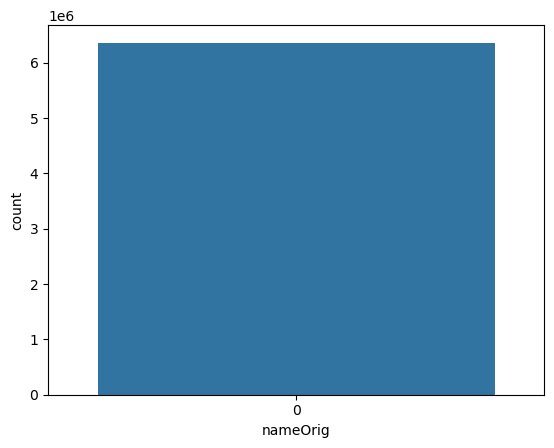

In [52]:
# Visualize number of nameOrig (0 for customer and 1 for merchant)
sns.countplot(data = df , x= 'nameOrig');

Only customers do transections 

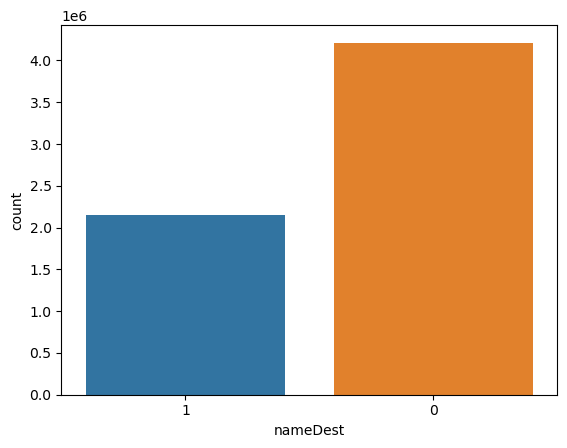

In [53]:
# Visualize number of nameDest (0 for customer and 1 for merchant)
sns.countplot(data = df , x= 'nameDest');

## Now I will drop unnecessary column (isFlaggedFraud) because it didnot provide any useful information


In [54]:
# Drop isFlaggedFraud column because the column does not serve a meaningful purpose in the context of the current analysis and is not relevant to our specific use case. By removing it, we streamline the dataset to focus on features that are more pertinent to the objectives of our analysis
df=df.drop(['isFlaggedFraud'], axis=1)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,1,9839.64,0,170136.0,160296.36,1,0.0,0.0,0
1,1,1,1864.28,0,21249.0,19384.72,1,0.0,0.0,0
2,1,3,181.00,0,181.0,0.00,0,0.0,0.0,1
3,1,0,181.00,0,181.0,0.00,0,21182.0,0.0,1
4,1,1,11668.14,0,41554.0,29885.86,1,0.0,0.0,0


## Handle outlier

Outliers in transaction amounts may correspond to fraudulent activities. Removing them might eliminate valuable information.So i decide to using capping technique for nonfraudlent only

In [55]:
def cap_outliers_iqr_isFraud_0(data, columns):
    for column in columns:
        # Filter data where isFraud = 0
        filtered_data = data[data['isFraud'] == 0]
        
        # Calculate Q1, Q3, and IQR for filtered data
        Q1 = filtered_data[column].quantile(0.25)
        Q3 = filtered_data[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define lower and upper bounds for filtered data
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap values outside the bounds in filtered data
        filtered_data[column] = filtered_data[column].clip(lower=lower_bound, upper=upper_bound)

        # Replace the capped data back into the original dataframe
        data.loc[filtered_data.index, column] = filtered_data[column]
        
    return data


In [56]:
# List of columns to cap
columns_to_cap = ['oldbalanceOrg', 'oldbalanceDest', 'amount','newbalanceOrig','newbalanceDest']

# Apply capping function to the dataframe
df = cap_outliers_iqr_isFraud_0(df, columns_to_cap)

# Check the result
print(df[columns_to_cap].describe())


C:\Users\saad3\AppData\Local\Temp\ipykernel_46188\3060225000.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[column] = filtered_data[column].clip(lower=lower_bound, upper=upper_bound)


       oldbalanceOrg  oldbalanceDest        amount  newbalanceOrig  \
count   6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06   
mean    7.392914e+04    6.010712e+05  1.336931e+05    8.915741e+04   
std     1.727716e+05    8.458371e+05  1.761138e+05    1.565606e+05   
min     0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00   
25%     0.000000e+00    0.000000e+00  1.338957e+04    0.000000e+00   
50%     1.420800e+04    1.327057e+05  7.487194e+04    0.000000e+00   
75%     1.073152e+05    9.430367e+05  2.087215e+05    1.442584e+05   
max     5.958504e+07    2.362305e+08  1.000000e+07    4.958504e+07   

       newbalanceDest  
count    6.362620e+06  
mean     7.158292e+05  
std      9.770778e+05  
min      0.000000e+00  
25%      0.000000e+00  
50%      2.146614e+05  
75%      1.111909e+06  
max      2.367265e+08  


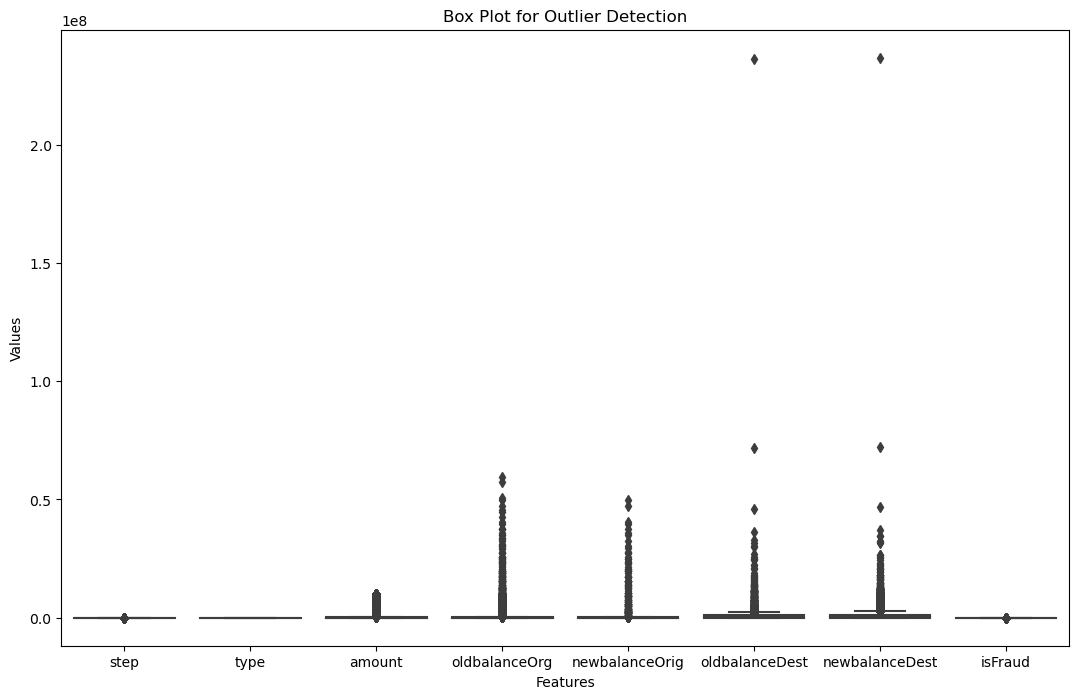

In [57]:
# Check the outlier
plt.figure(figsize=(13, 8))
sns.boxplot(data=df)
plt.title("Box Plot for Outlier Detection")
plt.xlabel("Features")
plt.ylabel("Values")
plt.show()

In [58]:
#Splitting the features and target column
X = df.drop(columns=['isFraud'])
y = df['isFraud']

## Handle imbalance data using SMOTE technique

In [59]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=42)
overX,overY=oversample.fit_resample(X, y)

In [60]:
#Spliting dataset into training set and test set i choose the test size to be 20% of the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(overX, overY, test_size = 0.2, random_state = 42)
X_train.shape,X_test.shape

((10167051, 9), (2541763, 9))

In [61]:
pd.DataFrame(overY,columns=['isFraud'])['isFraud'].value_counts()

0    6354407
1    6354407
Name: isFraud, dtype: int64

# Applying Ai Models and evaluate its performance

## Random Forest 

In [62]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(n_estimators=7, max_depth=8, max_leaf_nodes=9, n_jobs=-1, random_state=42)
RFC.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, max_leaf_nodes=9, n_estimators=7, n_jobs=-1,
                       random_state=42)

In [22]:
from sklearn.metrics import classification_report

y_pred_test = RFC.predict(X_test)
print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       0.98      0.96      0.97   1270837
           1       0.96      0.98      0.97   1270926

    accuracy                           0.97   2541763
   macro avg       0.97      0.97      0.97   2541763
weighted avg       0.97      0.97      0.97   2541763



Confusion Matrix of Random Forest model


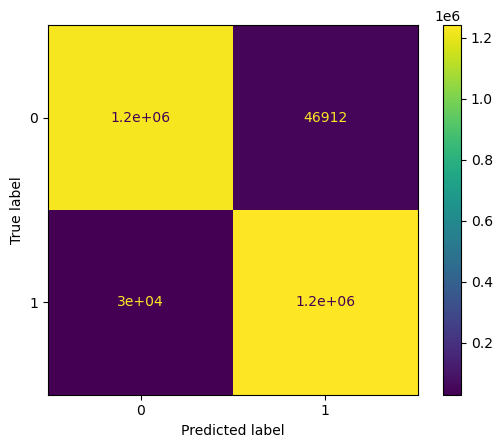

In [63]:
# A Confusion matrix shows number of false negative, true negative, true positive and false positive
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print("Confusion Matrix of Random Forest model")
y_pred_rf = RFC.predict(X_test)
confusion_rf= confusion_matrix(y_test, y_pred_rf)
cm=ConfusionMatrixDisplay(confusion_rf)
cm.plot()
plt.show()


AUC Score: 0.991


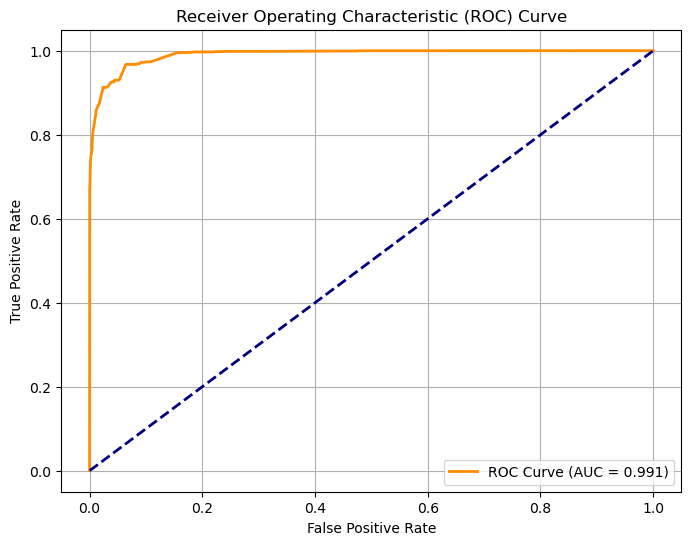

In [79]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for the test set
y_pred_proba = RFC.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Print AUC score
print(f"AUC Score: {roc_auc:.3f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()


## Decision Tree

In [64]:
#Apply DecisionTree model on the dataset
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 5, splitter="best", random_state = 42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [65]:
from sklearn.metrics import classification_report

y_pred_test = dt.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95   1270837
           1       0.92      0.99      0.96   1270926

    accuracy                           0.95   2541763
   macro avg       0.96      0.95      0.95   2541763
weighted avg       0.96      0.95      0.95   2541763



Confusion Matrix of Decision Tree model


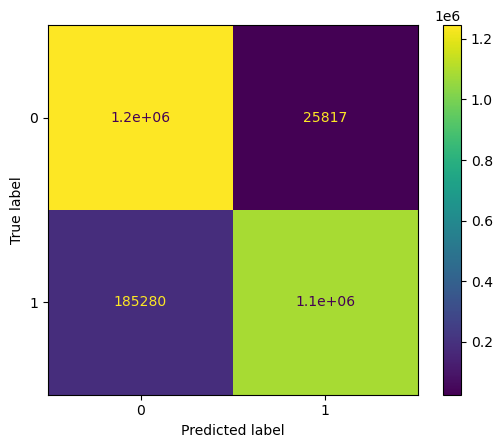

In [60]:
# A Confusion matrix shows number of false negative, true negative, true positive and false positive
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print("Confusion Matrix of Decision Tree model")
y_pred_dt = dt.predict(X_test)
confusion_dt= confusion_matrix(y_test, y_pred_dt)
cm=ConfusionMatrixDisplay(confusion_dt)
cm.plot()
plt.show()

AUC Score: 0.990


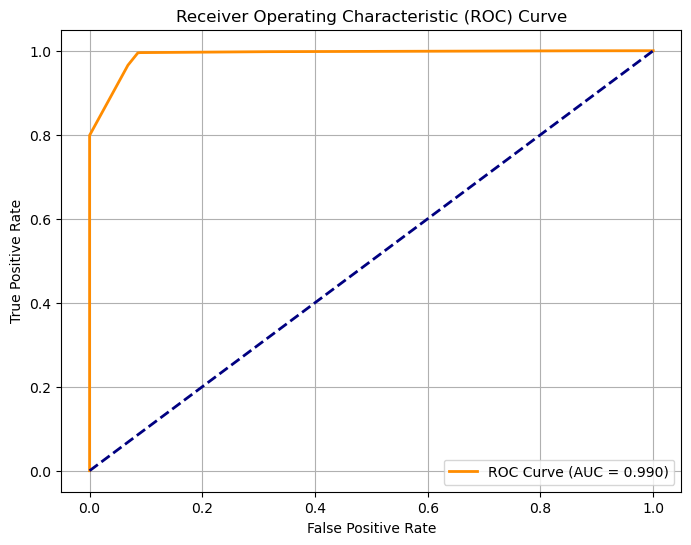

In [66]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for the test set
y_pred_proba = dt.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Print AUC score
print(f"AUC Score: {roc_auc:.3f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Now I will apply Deep learning models

## Graph neural networks and Multi Layer Perceptron

In [26]:
!pip install torch

     ------------------------------------ 192.2/192.2 MB 332.5 kB/s eta 0:00:00


In [28]:
!pip install torch-geometric

  Using cached torch_geometric-2.4.0-py3-none-any.whl (1.0 MB)


# Build Graph Neural Network
I used two types of GNNs, first GCN and second GRAPHsage 

In [35]:
import torch
from torch_geometric.data import Data


# Create nodes and edges
nodes = pd.concat([df['nameOrig'], df['nameDest']]).unique()
node_to_index = {node: index for index, node in enumerate(nodes)}
edges = torch.tensor(
    [[node_to_index[source], node_to_index[dest]] for source, dest in zip(df['nameOrig'], df['nameDest'])],
    dtype=torch.long
).t().contiguous()

# Create features 
features = torch.tensor(df[['amount', 'oldbalanceOrg', 'type', 'oldbalanceDest', 'step', 'newbalanceOrig','newbalanceDest']].values, dtype=torch.float)

# Create target labels
target = torch.tensor(df['isFraud'].values, dtype=torch.long)

# Create a PyTorch Geometric Data object
data = Data(x=features, edge_index=edges, y=target)


print(data)


Data(x=[6362620, 7], edge_index=[2, 6362620], y=[6362620])


In [36]:
# Convert target labels to binary beacuse the model didnot read it as 0 and 1 
target = torch.where(target != 0, 1, target)


In [37]:
# Check values in target labels
unique_labels = torch.unique(target)
print("Unique values in target labels:", unique_labels)

# Ensure the target labels are of type int
if target.dtype != torch.long:
    target = target.long()

unique_labels_after_conversion = torch.unique(target)
print("Unique values in target labels after conversion:", unique_labels_after_conversion)

# Check the shape of the target labels
if target.dim() > 1:
    target = target.squeeze()

# Ensure the target labels are 1-dimensional
if target.dim() > 1:
    raise ValueError("Target labels must be 1-dimensional.")

# Create a PyTorch Geometric Data object
data = Data(x=features, edge_index=edges, y=target)

Unique values in target labels: tensor([0, 1])
Unique values in target labels after conversion: tensor([0, 1])


## Apply GCN with Adam optimizer, lr = 0.01 and ReLu activation function 

## Here i decieded to apply a different techniques to handle the imbalance of the dataset which (Random oversampling)

Epoch 1/20, Loss: 0.6282, Training Accuracy: 0.6176
Test Accuracy: 0.6799
Epoch 2/20, Loss: 0.5919, Training Accuracy: 0.6799
Test Accuracy: 0.7098
Epoch 3/20, Loss: 0.5629, Training Accuracy: 0.7097
Test Accuracy: 0.7304
Epoch 4/20, Loss: 0.5385, Training Accuracy: 0.7303
Test Accuracy: 0.7488
Epoch 5/20, Loss: 0.5172, Training Accuracy: 0.7488
Test Accuracy: 0.7610
Epoch 6/20, Loss: 0.4981, Training Accuracy: 0.7610
Test Accuracy: 0.7685
Epoch 7/20, Loss: 0.4810, Training Accuracy: 0.7684
Test Accuracy: 0.7827
Epoch 8/20, Loss: 0.4655, Training Accuracy: 0.7825
Test Accuracy: 0.8030
Epoch 9/20, Loss: 0.4514, Training Accuracy: 0.8029
Test Accuracy: 0.8221
Epoch 10/20, Loss: 0.4386, Training Accuracy: 0.8223
Test Accuracy: 0.8405
Epoch 11/20, Loss: 0.4268, Training Accuracy: 0.8405
Test Accuracy: 0.8544
Epoch 12/20, Loss: 0.4160, Training Accuracy: 0.8544
Test Accuracy: 0.8647
Epoch 13/20, Loss: 0.4061, Training Accuracy: 0.8647
Test Accuracy: 0.8698
Epoch 14/20, Loss: 0.3972, Trainin

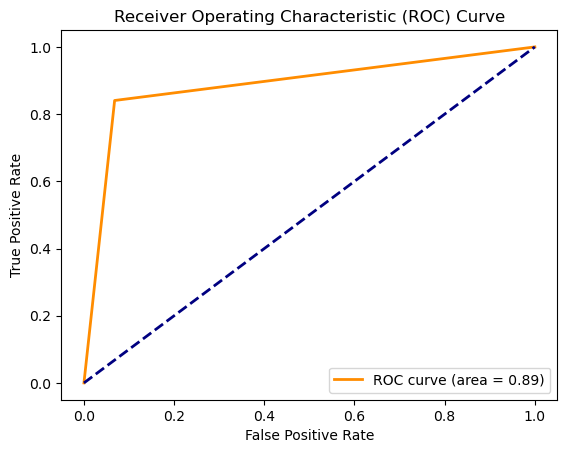

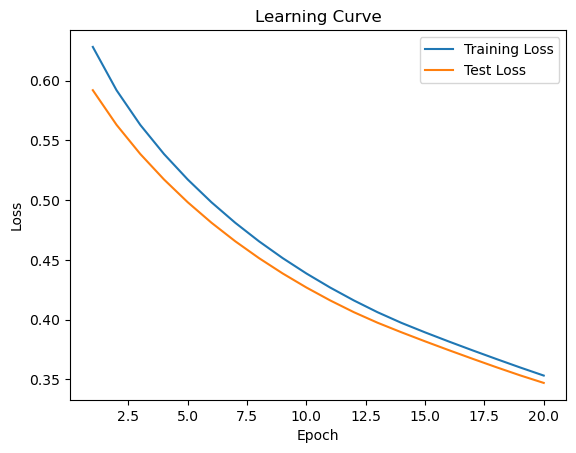

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89   1270837
           1       0.93      0.84      0.88   1270926

    accuracy                           0.89   2541763
   macro avg       0.89      0.89      0.89   2541763
weighted avg       0.89      0.89      0.89   2541763



In [40]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.data import Data
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from torch_geometric.nn import GCNConv
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
# Reshape the data for oversampling
X = data.x.numpy()
X = X.reshape(X.shape[0], -1)  
y = data.y.numpy()


# Apply normalization to the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)  # Normalize the features

# Apply oversampling
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_normalized, y)

# Convert the resampled data back to PyTorch tensors
X_resampled = torch.FloatTensor(X_resampled)
y_resampled = torch.LongTensor(y_resampled)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create PyTorch Geometric Data objects for training and testing
train_data = Data(x=X_train, edge_index=data.edge_index, y=y_train)
test_data = Data(x=X_test, edge_index=data.edge_index, y=y_test)

# Define a GNN model
class GNN(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(GNN, self).__init__()
        self.conv1 = GCNConv(in_channels, 16)
        self.conv2 = GCNConv(16, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)
        return x

# Instantiate the model
model = GNN(in_channels=7, out_channels=1)

# Define the number of epochs
num_epochs = 20

# Loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Lists to store learning curve data
train_losses = []
test_losses = []

# Train the model
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    output = model(train_data)
    loss = criterion(output, train_data.y.view(-1, 1).float())  # Assuming binary classification
    loss.backward()
    optimizer.step()

    # Calculate accuracy on the training set
    predictions = (torch.sigmoid(output) > 0.5).float()
    accuracy = accuracy_score(train_data.y.cpu().numpy(), predictions.cpu().numpy())
    
    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item():.4f}, Training Accuracy: {accuracy:.4f}')
    
    # Append training loss to the list
    train_losses.append(loss.item())

    # Evaluate on the test set
    model.eval()
    with torch.no_grad():
        test_output = model(test_data)
        test_loss = criterion(test_output, test_data.y.view(-1, 1).float())
        test_predictions = (torch.sigmoid(test_output) > 0.5).float()

    # Calculate accuracy on the test set
    test_accuracy = accuracy_score(test_data.y.cpu().numpy(), test_predictions.cpu().numpy())
    print(f'Test Accuracy: {test_accuracy:.4f}')
    
    # Append test loss to the list
    test_losses.append(test_loss.item())
# Calculate ROC curve
fpr, tpr, _ = roc_curve(test_data.y.cpu().numpy(), test_predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot learning curve
plt.figure()
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()
######################################
classification_rep = classification_report(test_data.y.cpu().numpy(), test_predictions.cpu().numpy())
print("Classification Report:\n", classification_rep)

## GRAPHsage with Adam optimizer, lr = 0.01 and ReLu activation function

Epoch 1/20, Loss: 0.7621, Training Accuracy: 0.3062
Test Accuracy: 0.4143
Epoch 2/20, Loss: 0.6930, Training Accuracy: 0.4143
Test Accuracy: 0.4582
Epoch 3/20, Loss: 0.6574, Training Accuracy: 0.4582
Test Accuracy: 0.4996
Epoch 4/20, Loss: 0.6328, Training Accuracy: 0.4996
Test Accuracy: 0.4993
Epoch 5/20, Loss: 0.6138, Training Accuracy: 0.4993
Test Accuracy: 0.5121
Epoch 6/20, Loss: 0.5983, Training Accuracy: 0.5121
Test Accuracy: 0.5184
Epoch 7/20, Loss: 0.5850, Training Accuracy: 0.5185
Test Accuracy: 0.5226
Epoch 8/20, Loss: 0.5735, Training Accuracy: 0.5227
Test Accuracy: 0.5270
Epoch 9/20, Loss: 0.5633, Training Accuracy: 0.5272
Test Accuracy: 0.5349
Epoch 10/20, Loss: 0.5543, Training Accuracy: 0.5350
Test Accuracy: 0.5436
Epoch 11/20, Loss: 0.5461, Training Accuracy: 0.5437
Test Accuracy: 0.5512
Epoch 12/20, Loss: 0.5385, Training Accuracy: 0.5512
Test Accuracy: 0.5590
Epoch 13/20, Loss: 0.5313, Training Accuracy: 0.5591
Test Accuracy: 0.5661
Epoch 14/20, Loss: 0.5243, Trainin

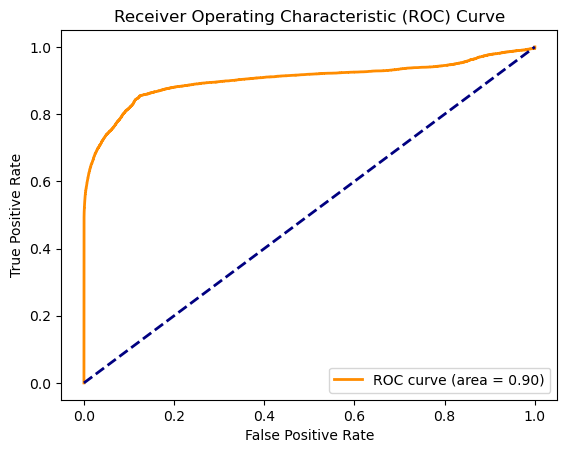

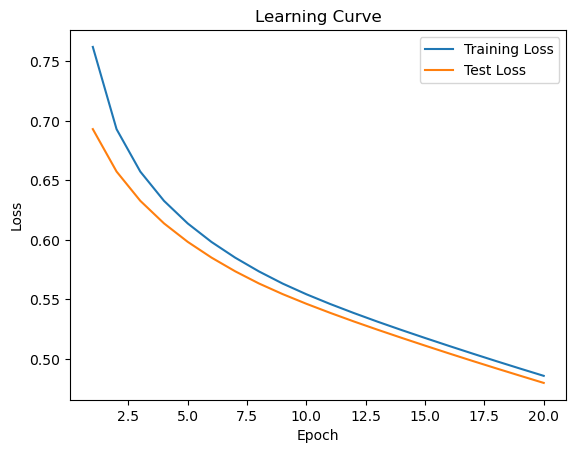

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.67      0.76   1270837
           1       0.73      0.90      0.81   1270926

    accuracy                           0.79   2541763
   macro avg       0.80      0.79      0.78   2541763
weighted avg       0.80      0.79      0.78   2541763



In [41]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.data import Data
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from torch_geometric.nn import SAGEConv
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Reshape the data for oversampling
X = data.x.numpy()
X = X.reshape(X.shape[0], -1)  # Flatten the feature matrix
y = data.y.numpy()


# Apply normalization to the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)  # Normalize the features


# Apply oversampling
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_normalized, y)

# Convert the resampled data back to PyTorch tensors
X_resampled = torch.FloatTensor(X_resampled)
y_resampled = torch.LongTensor(y_resampled)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create PyTorch Geometric Data objects for training and testing
train_data = Data(x=X_train, edge_index=data.edge_index, y=y_train)
test_data = Data(x=X_test, edge_index=data.edge_index, y=y_test)

# Define a GraphSAGE model
class GraphSAGE(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(GraphSAGE, self).__init__()
        self.conv1 = SAGEConv(in_channels, 16)
        self.conv2 = SAGEConv(16, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)
        return x

# Instantiate the model
model = GraphSAGE(in_channels=7, out_channels=1)

# Define the number of epochs
num_epochs = 20

# Loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Lists to store learning curve data
train_losses = []
test_losses = []

# Train the model
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    output = model(train_data)
    loss = criterion(output, train_data.y.view(-1, 1).float())  # Assuming binary classification
    loss.backward()
    optimizer.step()

    # Calculate accuracy on the training set
    predictions = (torch.sigmoid(output) > 0.5).float()
    accuracy = accuracy_score(train_data.y.cpu().numpy(), predictions.cpu().numpy())
    
    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item():.4f}, Training Accuracy: {accuracy:.4f}')
    
    # Append training loss to the list
    train_losses.append(loss.item())

    # Evaluate on the test set
    model.eval()
    with torch.no_grad():
        test_output = model(test_data)
        test_loss = criterion(test_output, test_data.y.view(-1, 1).float())
        test_predictions = (torch.sigmoid(test_output) > 0.5).float()

    # Calculate accuracy on the test set
    test_accuracy = accuracy_score(test_data.y.cpu().numpy(), test_predictions.cpu().numpy())
    print(f'Test Accuracy: {test_accuracy:.4f}')
    
    # Append test loss to the list
    test_losses.append(test_loss.item())
# Calculate ROC curve

fpr, tpr, _ = roc_curve(test_data.y.cpu().numpy(), torch.sigmoid(test_output).cpu().numpy())
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot learning curve
plt.figure()
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()
######################################
classification_rep = classification_report(test_data.y.cpu().numpy(), test_predictions.cpu().numpy())
print("Classification Report:\n", classification_rep)

## GRAPHsage vs GCN

GCN achieved a better performance in every thing. It had higher accuracy than GRAPHsage with 89% on the other hand GRAPHsage had better ROCcurve with AUC value equal to 0.90 

# MLP MODEL 

## I applied MLP on small portion of the dataset

In [32]:
F_detection=df.copy()

In [34]:
from sklearn.neural_network import MLPClassifier
# Subsample for testing BEC. the data is very larg 
test_subset = F_detection.sample(frac=0.01, random_state=42)

X = test_subset.drop("isFraud", axis=1)
y = test_subset[["isFraud"]]
#split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Cross-validation
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)


In [35]:
print(X_train.shape)
print(X_test.shape)

(47719, 9)
(15907, 9)


In [36]:
# Create MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

# Train the model
mlp_model.fit(X_train, y_train)  # Use .values.ravel() to avoid DataConversionWarning


C:\DRIVERS\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

In [37]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = mlp_model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
                           
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.9981140378449739
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15888
           1       0.34      0.63      0.44        19

    accuracy                           1.00     15907
   macro avg       0.67      0.82      0.72     15907
weighted avg       1.00      1.00      1.00     15907



Confusion Matrix of MLP model


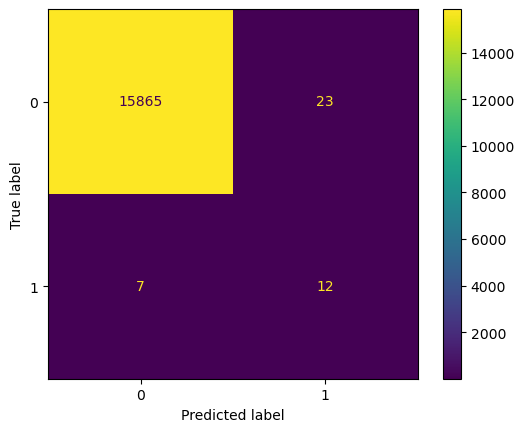

In [38]:
#confution matrix for MLP model Before the under sampling:
#to retrieve  number of false negative, true negative, true positive and false positive
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print("Confusion Matrix of MLP model")
y_pred_LR = mlp_model.predict(X_test)
confusion_LR= confusion_matrix(y_test, y_pred_LR)
cm=ConfusionMatrixDisplay(confusion_LR)
cm.plot()
plt.show()

C:\DRIVERS\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\DRIVERS\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\DRIVERS\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\DRIVERS\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

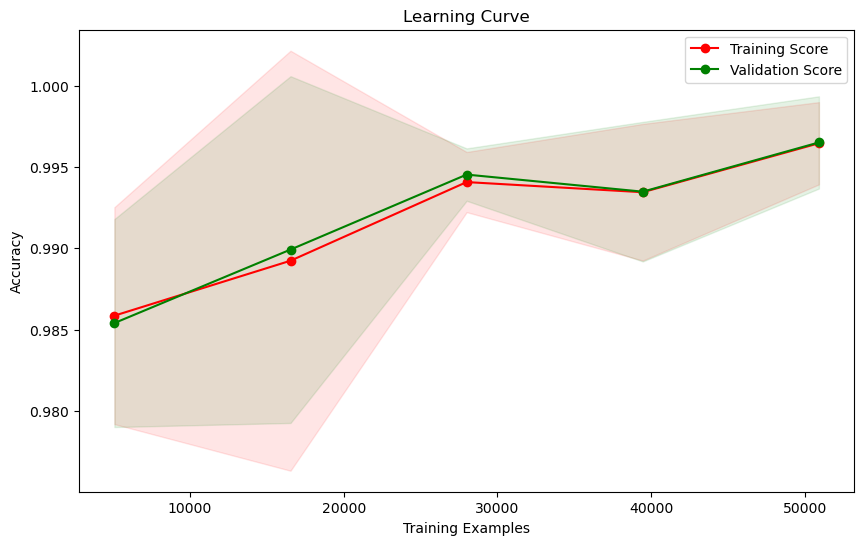

In [39]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, X, y, cv, train_sizes=np.linspace(0.1, 1.0, 5)):
    train_sizes, train_scores, validation_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='accuracy'
    )

    # Calculate mean and standard deviation for training and validation scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    # Plot learning curve
    plt.figure(figsize=(10, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                     validation_scores_mean + validation_scores_std, alpha=0.1, color='g')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
    plt.plot(train_sizes, validation_scores_mean, 'o-', color='g', label='Validation Score')
    plt.xlabel('Training Examples')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.title('Learning Curve')

# Call the learning curve function with your data
plot_learning_curve(mlp_model, X, y, cv=5)

# Show the plot
plt.show()

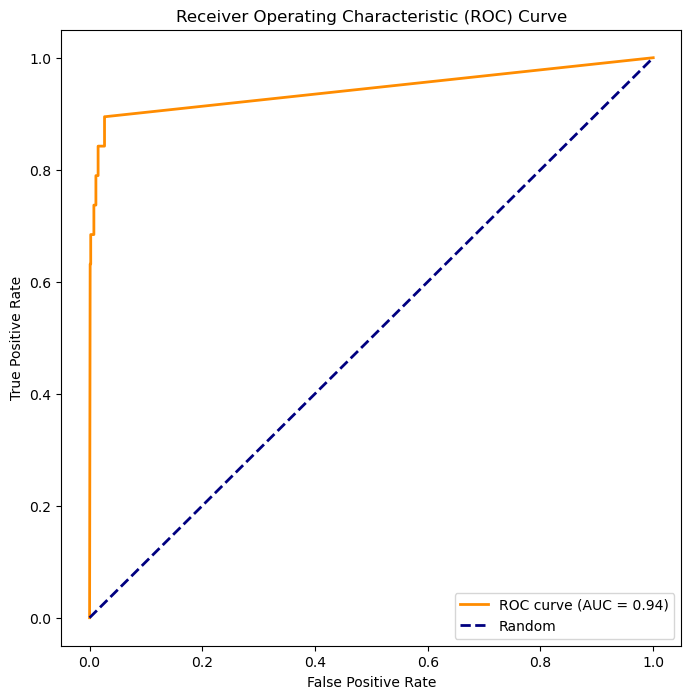

In [40]:
from sklearn.metrics import roc_curve, auc
# Get predicted probabilities for the positive class (class 1)
y_probs = mlp_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Before the undersampling the model achieved a very high accuracy of 99.8%. However, the classification report reveals an imbalance in performance between the two classes. While the model is excellent at classifying the majority class (class 0), its performance on the minority class (class 1) is not as good, with lower precision, recall, and F1-score.

# UNDER SAMPLING:

In [41]:
from imblearn.under_sampling import RandomUnderSampler
# Undersample the training set using RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)


In [42]:
# Create MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

# Train the model
mlp_model.fit(X_train_resampled, y_train_resampled)

C:\DRIVERS\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

# THE ACCURACY AFTER THE UNDER SAMPLING:

In [43]:
# Make predictions on the entire dataset
y_pred = mlp_model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
                           
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.8940089268875338
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94     15888
           1       0.01      1.00      0.02        19

    accuracy                           0.89     15907
   macro avg       0.51      0.95      0.48     15907
weighted avg       1.00      0.89      0.94     15907



Confusion Matrix of MLP model


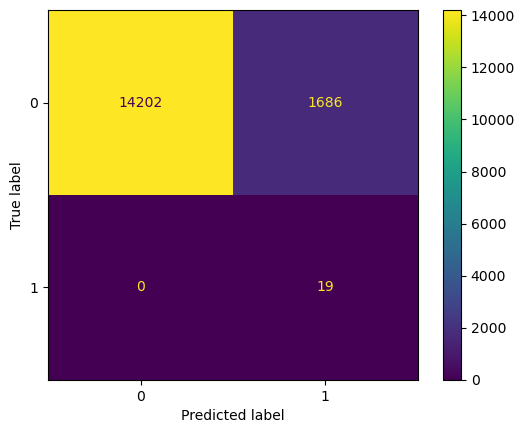

In [44]:
#confution matrix for MLP model after under sampling:
#to retrieve  number of false negative, true negative, true positive and false positive
print("Confusion Matrix of MLP model")
y_pred_LR = mlp_model.predict(X_test)
confusion_LR= confusion_matrix(y_test, y_pred_LR)
cm=ConfusionMatrixDisplay(confusion_LR)
cm.plot()
plt.show()

C:\DRIVERS\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\DRIVERS\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\DRIVERS\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\DRIVERS\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

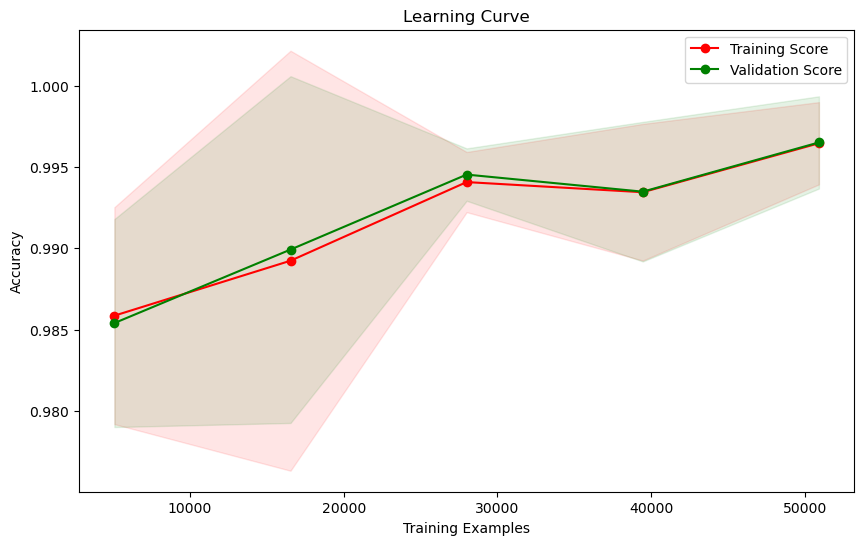

In [45]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, X, y, cv, train_sizes=np.linspace(0.1, 1.0, 5)):
    train_sizes, train_scores, validation_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='accuracy'
    )

    # Calculate mean and standard deviation for training and validation scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    # Plot learning curve
    plt.figure(figsize=(10, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                     validation_scores_mean + validation_scores_std, alpha=0.1, color='g')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
    plt.plot(train_sizes, validation_scores_mean, 'o-', color='g', label='Validation Score')
    plt.xlabel('Training Examples')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.title('Learning Curve')

# Call the learning curve function with your data
plot_learning_curve(mlp_model, X, y, cv=5)

# Show the plot
plt.show()

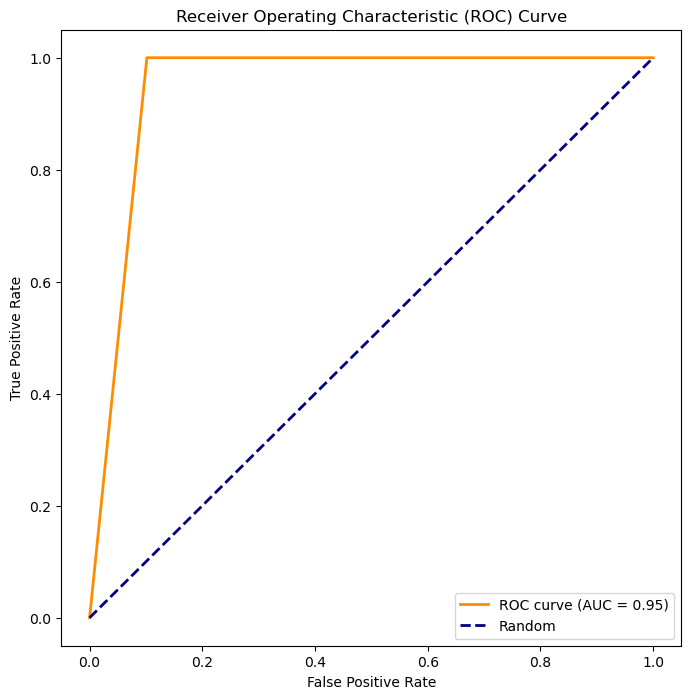

In [46]:
# Get predicted probabilities for the positive class (class 1)
y_probs = mlp_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## After the undersampling the accuracy has decreased to 89.4%, but the performance on the minority class has improved significantly. The precision, recall, and F1-score for class 1 have all increased. This indicates that the undersampling technique has helped address the imbalance issue, making the model more balanced in its predictions for both classes.

# MLP VS GNNs

#### Very important note: MLP applied on a portion of the dataset while GNNs applied on the whole dataset. 

Both of these models achieved a good accuracy almost the same, however MLP had a much better ROC curve than GNN with 0.95 while the best percentage for GNNs was 0.88  which indicates it had more tpr. Both of them had a good f1 score after handling the imbalance
